# OpenAI gym frozenlake

In [1]:
import gym

In [2]:
from collections import defaultdict

In [3]:
from tqdm import tqdm

In [4]:
import random

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

In [8]:
N_GAMES = 100

In [9]:
env = gym.make('MountainCar-v0')

/home/matteo/miniconda3/envs/rl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [34]:
thresholds_p = np.linspace(-1.1,0.5, 10)
thresholds_v = np.linspace(-0.06,0.06, 10)

def discretize_state(s_cont):
    
#     thresholds_p = np.linspace(-1.1,0.5, 10)
#     thresholds_v = np.linspace(-0.6,0.6, 10)
    
#     s_disc = (s_cont*beta).astype(int)

#     return tuple(s_disc)

    s_disc = (
        np.digitize(s_cont[0], thresholds_p),
        np.digitize(s_cont[1], thresholds_v))
    
    return s_disc
    

In [11]:
def choose_action_greedy(q_table, obs, env):
    
    max_i = 0
    max_v = q_table[(obs, 0)]

    for i in range(env.action_space.n):
        v = q_table[(obs, i)]

        if v > max_v:
            max_v = v
            max_i = i

    return max_i

In [12]:
def choose_action_eps(q_table, obs, env, eps):
    
    # q_table[obs, a]
    
    if random.random() < eps:
        return env.action_space.sample()
    else:
        return choose_action_greedy(q_table, obs, env)

In [13]:
def test_game(env, q_table, n_games=N_GAMES):
    
    total_reward = 0.0
    
    for _ in range(n_games):

        done = False
        obs = env.reset()

        while not done:
            # Choose an action greedily
            new_obs, reward, done, info = env.step(choose_action_greedy(q_table, discretize_state(obs), env))
            total_reward += reward
            
            obs = new_obs

    return total_reward/n_games


In [14]:
def q_learning(q_table, obs, action, reward, new_obs, n_actions, lr, gamma):
    """
    lr : float
        Learning rate
    gamma : float
        Discount factor for future rewards
    """
    
    # TD(0) learning

    # Update entry using bellman's equation
#     q_table[(obs, action)] += lr * (
#         reward + 
#         gamma*max([q_table[(new_obs, a)] for a in range(n_actions)]) -
#         q_table[(obs, action)])
    
    
    target = reward + gamma * max([q_table[(new_obs, a)] for a in range(n_actions)]) 
    
    q_error = target - q_table[(obs, action)]
    
    q_table[(obs, action)] += lr * q_error

In [17]:
EPS_DECAY = 0.99993
GAMMA = 0.99
LR = 0.8

EVALUATE_EVERY = 1000

In [36]:
def training(env, q_table, n_episodes, eps, eps_decay=EPS_DECAY, evaluate_every=EVALUATE_EVERY):
    
    mean_rewards = list()
    
    total_reward = 0

    for i in range(n_episodes):
        done = False

        obs = env.reset()

        while not done:
            # Choose an action epsilon-greedily
            action = choose_action_eps(q_table, discretize_state(obs), env, eps)

            new_obs, reward, done, info = env.step(action)
            
            total_reward += reward
            
            print(discretize_state(obs))

            q_learning(q_table, discretize_state(obs), action, reward, discretize_state(new_obs), n_actions, lr=LR, gamma=GAMMA)
            obs = new_obs

        eps *= eps_decay

        # Evaluate policy every N games
        if (i+1)%evaluate_every == 0:

            test_reward = test_game(env, q_table)
            print(f'\tEp: {i+1}  Average reward: {total_reward/evaluate_every} Test reward: {test_reward} {eps:.2f}')
            
            total_reward = 0

            mean_rewards.append(test_reward)
            
    return mean_rewards

In [37]:
# Main learning loop

N_EPISODES = 30000

eps = 1.0

q_table = defaultdict(float)

# Save n of actions
n_actions = env.action_space.n

mean_rewards = training(env, q_table, N_EPISODES, eps)

	Ep: 1000  Total reward: -200000.0 Test reward: -200.0 0.93
	Ep: 2000  Total reward: -400000.0 Test reward: -200.0 0.87
	Ep: 3000  Total reward: -600000.0 Test reward: -200.0 0.81
	Ep: 4000  Total reward: -800000.0 Test reward: -200.0 0.76
	Ep: 5000  Total reward: -1000000.0 Test reward: -200.0 0.70
	Ep: 6000  Total reward: -1200000.0 Test reward: -200.0 0.66
	Ep: 7000  Total reward: -1400000.0 Test reward: -200.0 0.61
	Ep: 8000  Total reward: -1600000.0 Test reward: -200.0 0.57
	Ep: 9000  Total reward: -1800000.0 Test reward: -200.0 0.53
	Ep: 10000  Total reward: -2000000.0 Test reward: -200.0 0.50
	Ep: 11000  Total reward: -2200000.0 Test reward: -200.0 0.46
	Ep: 12000  Total reward: -2400000.0 Test reward: -200.0 0.43
	Ep: 13000  Total reward: -2600000.0 Test reward: -200.0 0.40
	Ep: 14000  Total reward: -2800000.0 Test reward: -200.0 0.38
	Ep: 15000  Total reward: -3000000.0 Test reward: -200.0 0.35
	Ep: 16000  Total reward: -3200000.0 Test reward: -200.0 0.33
	Ep: 17000  Total rew

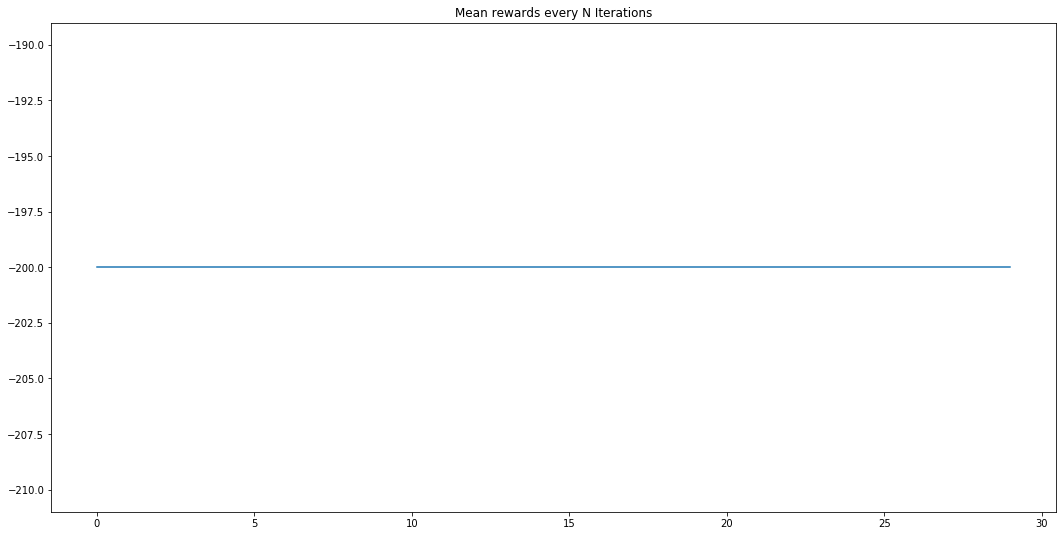

In [38]:
plt.figure(figsize=(18,9))
plt.plot(mean_rewards)
plt.title("Mean rewards every N Iterations");

In [ ]:
1/0

In [28]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    print(num_states)
    
    1/0
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')   
plt.close() 

[19 15]


/home/matteo/miniconda3/envs/rl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ZeroDivisionError: division by zero